In [ ]:
#Import Library
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import ADASYN
#from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#!pip install --upgrade scikit-learn
import sklearn

In [ ]:
# Load and preprocess data
X_train = pd.read_csv(r"/content/drive/MyDrive/X_Filtered_train2.csv", sep='\t',encoding='utf-8',header=0)
X_test = pd.read_csv(r"/content/drive/MyDrive/X_Filtered_test2.csv", sep='\t',encoding='utf-8',header=0)
X_valid = pd.read_csv(r"/content/drive/MyDrive/X_Filtered_valid2.csv", sep='\t',encoding='utf-8',header=0)

y_train = pd.read_csv(r"/content/drive/MyDrive/y_train2.csv", sep='\t',encoding='utf-8',header=0)
y_test = pd.read_csv(r"/content/drive/MyDrive/y_test2.csv", sep='\t',encoding='utf-8',header=0)
y_valid = pd.read_csv(r"/content/drive/MyDrive/y_valid2.csv", sep='\t',encoding='utf-8',header=0)

In [ ]:
# For a single DataFrame
memory_in_bytes = X_train.memory_usage(deep=True).sum()
memory_in_megabytes = memory_in_bytes / (1024 ** 2)  # Convert bytes to megabytes
print(f"Memory used by X_train: {memory_in_megabytes:.2f} MB")


Memory used by X_train: 80.41 MB


In [ ]:
y_train.head()

,Unnamed: 0,TARGET
0,79,1
1,80,1
2,81,1
3,82,1
4,83,1


In [ ]:
y_train = y_train.drop('Unnamed: 0', axis=1)

In [ ]:
print(y_train.shape)
print(y_train.head())


(54328, 1)
   TARGET
0       1
1       1
2       1
3       1
4       1


In [ ]:
y_valid = y_valid.drop('Unnamed: 0', axis=1)

In [ ]:
y_test = y_test.drop('Unnamed: 0', axis=1)

In [ ]:
#Hyperparameter Tuning

In [ ]:
from sklearn import svm
import time

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10],
            'gamma': [1.0],
            'kernel': ['rbf']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'criterion': ['entropy'],
            'max_depth': [10,20,30],

        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto', max_iter=600),
        'params': {
            'C': [ 1, 10],
            'penalty': ["l2"]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    start_time = time.time()

    clf = GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False,n_jobs=-1)
    clf.fit(X_train, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"{model_name} took {elapsed_time:.2f} seconds")

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df1 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df1)


svm took 6452.32 seconds
random_forest took 49.99 seconds
Naive Bayes took 48.48 seconds
logistic_regression took 22.06 seconds
decision_tree took 16.77 seconds
k_neighbors took 292.14 seconds
                 model  best_score  \
0                  svm    0.950596   
1        random_forest    0.805110   
2          Naive Bayes    0.965469   
3  logistic_regression    0.651358   
4        decision_tree    0.617545   
5          k_neighbors    0.617969   

                                         best_params  
0            {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}  
1  {'criterion': 'entropy', 'max_depth': 10, 'n_e...  
2           {'var_smoothing': 0.0001519911082952933}  
3                          {'C': 1, 'penalty': 'l2'}  
4  {'criterion': 'gini', 'max_depth': None, 'min_...  
5  {'algorithm': 'auto', 'n_neighbors': 7, 'weigh...  


In [ ]:
df1

,model,best_score,best_params
0,svm,0.950596,"{'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}"
1,random_forest,0.805110,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
2,Naive Bayes,0.965469,{'var_smoothing': 0.0001519911082952933}
3,logistic_regression,0.651358,"{'C': 1, 'penalty': 'l2'}"
4,decision_tree,0.617545,"{'criterion': 'gini', 'max_depth': None, 'min_..."
5,k_neighbors,0.617969,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh..."


In [ ]:
from sklearn import svm
import time

model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [30,40],
            'criterion': ['entropy'],
            'max_depth': [1,2],
            'min_samples_leaf':[4],
            'min_samples_split':[10]

        }


}}

scores = []

for model_name, mp in model_params.items():
    start_time = time.time()

    clf = GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False,n_jobs=-1)
    clf.fit(X_train, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"{model_name} took {elapsed_time:.2f} seconds")

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df4 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df4)


random_forest took 4.26 seconds
           model  best_score  \
0  random_forest    0.950596   

                                         best_params  
0  {'criterion': 'entropy', 'max_depth': 1, 'min_...  


In [ ]:
df4

,model,best_score,best_params
0,random_forest,0.950596,"{'criterion': 'entropy', 'max_depth': 1, 'min_..."


In [ ]:
from sklearn import svm
import time

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'criterion': ['entropy'],
            'max_depth': [10, 20, 30],
            'max_features': ['auto', 'sqrt', 0.5],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto', max_iter=600),
        'params': {
            'C': [1, 10],
            'penalty': ["l2"],
            'fit_intercept': [True, False],
            'class_weight': [None, 'balanced']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'splitter': ['best', 'random'],
            'max_features': ['auto', 'sqrt', 0.5],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': [None, 'balanced']
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [8,9,10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto'],

        }
    }
}


scores = []

for model_name, mp in model_params.items():
    start_time = time.time()

    clf = GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False,n_jobs=-1)
    clf.fit(X_train, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"{model_name} took {elapsed_time:.2f} seconds")

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df2 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df2)


random_forest took 1487.04 seconds
logistic_regression took 98.03 seconds
decision_tree took 210.40 seconds
k_neighbors took 218.44 seconds
                 model  best_score  \
0        random_forest    0.840046   
1  logistic_regression    0.651358   
2        decision_tree    0.928398   
3          k_neighbors    0.618024   

                                         best_params  
0  {'bootstrap': False, 'criterion': 'entropy', '...  
1  {'C': 1, 'class_weight': None, 'fit_intercept'...  
2  {'class_weight': None, 'criterion': 'entropy',...  
3  {'algorithm': 'auto', 'n_neighbors': 9, 'weigh...  


In [ ]:
df2

,model,best_score,best_params
0,random_forest,0.840046,"{'bootstrap': False, 'criterion': 'entropy', '..."
1,logistic_regression,0.651358,"{'C': 1, 'class_weight': None, 'fit_intercept'..."
2,decision_tree,0.928398,"{'class_weight': None, 'criterion': 'entropy',..."
3,k_neighbors,0.618024,"{'algorithm': 'auto', 'n_neighbors': 9, 'weigh..."


In [ ]:
#feature scaling
col_name = list(X_train.columns)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_minmax = scaler.fit_transform(X_train)

X_test_minmax =scaler.transform(X_test)

X_train_minmax = pd.DataFrame(X_train_minmax, columns=col_name)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=col_name)

In [ ]:
from sklearn import svm
import time

model_params = {




    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [105,107],
            'weights': ['uniform'],
            'algorithm': ['auto'],

        }
    }
}


scores = []

for model_name, mp in model_params.items():
    start_time = time.time()

    clf = GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False,n_jobs=-1)
    clf.fit(X_train_minmax, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"{model_name} took {elapsed_time:.2f} seconds")

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df3 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df3)


k_neighbors took 64.69 seconds
         model  best_score                                        best_params
0  k_neighbors    0.914869  {'algorithm': 'auto', 'n_neighbors': 107, 'wei...


In [ ]:
df3

,model,best_score,best_params
0,k_neighbors,0.914869,"{'algorithm': 'auto', 'n_neighbors': 107, 'wei..."


In [ ]:
df3

,model,best_score,best_params
0,logistic_regression,0.956174,"{'C': 0.001, 'fit_intercept': True, 'penalty':..."
1,k_neighbors,0.702916,"{'algorithm': 'auto', 'n_neighbors': 9, 'weigh..."



 LogisticRegression : 

Training Score for LogisticRegression :  97.61
Testing Score for LogisticRegression : 96.97
Classification report  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     55899
           1       0.77      0.56      0.65      2936

    accuracy                           0.97     58835
   macro avg       0.87      0.78      0.82     58835
weighted avg       0.97      0.97      0.97     58835

Confusion matrix  
 [[55396   503]
 [ 1282  1654]]
ROC AUC  : 0.7771765632868506
sensitivity is %f 0.5633514986376021
specificity is %f 0.991001627936099
accuracy is %f 0.9696609161213563
balanced accuracy is % 0.7771765632868506
Type1 Error is %f 503.0
Type2 Error is %f 1282.0


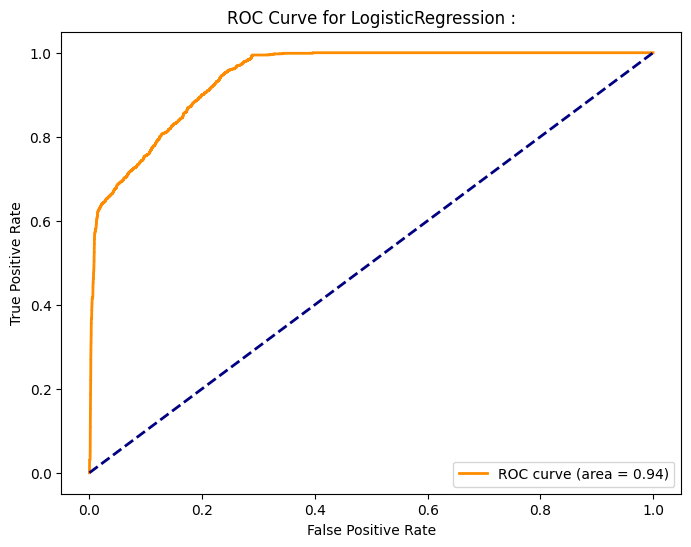


 DecisionTree : 

Training Score for DecisionTree :  95.77
Testing Score for DecisionTree : 95.44
Classification report  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     55899
           1       0.67      0.17      0.27      2936

    accuracy                           0.95     58835
   macro avg       0.82      0.58      0.62     58835
weighted avg       0.94      0.95      0.94     58835

Confusion matrix  
 [[55655   244]
 [ 2436   500]]
ROC AUC  : 0.5829673560230492
sensitivity is %f 0.17029972752043596
specificity is %f 0.9956349845256623
accuracy is %f 0.9544488824679187
balanced accuracy is % 0.5829673560230492
Type1 Error is %f 244.0
Type2 Error is %f 2436.0


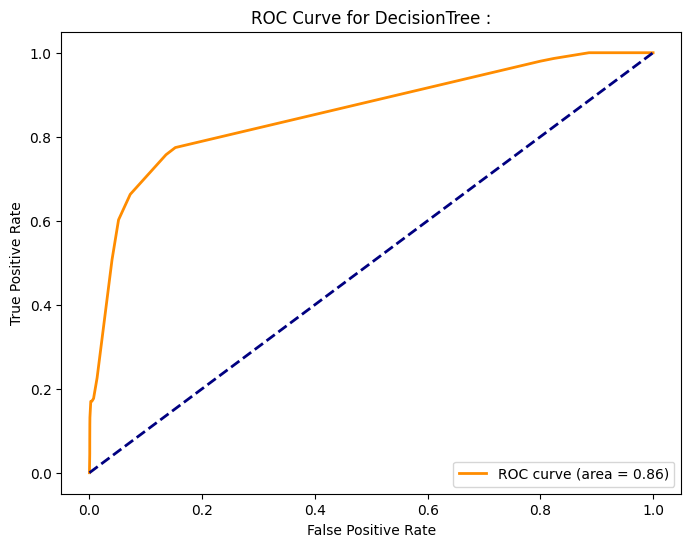


 RandomForest : 

Training Score for RandomForest :  95.06
Testing Score for RandomForest : 95.01
Classification report  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     55899
           1       0.00      0.00      0.00      2936

    accuracy                           0.95     58835
   macro avg       0.48      0.50      0.49     58835
weighted avg       0.90      0.95      0.93     58835

Confusion matrix  
 [[55899     0]
 [ 2936     0]]
ROC AUC  : 0.5
sensitivity is %f 0.0
specificity is %f 1.0
accuracy is %f 0.9500977309424662
balanced accuracy is % 0.5
Type1 Error is %f 0.0
Type2 Error is %f 2936.0


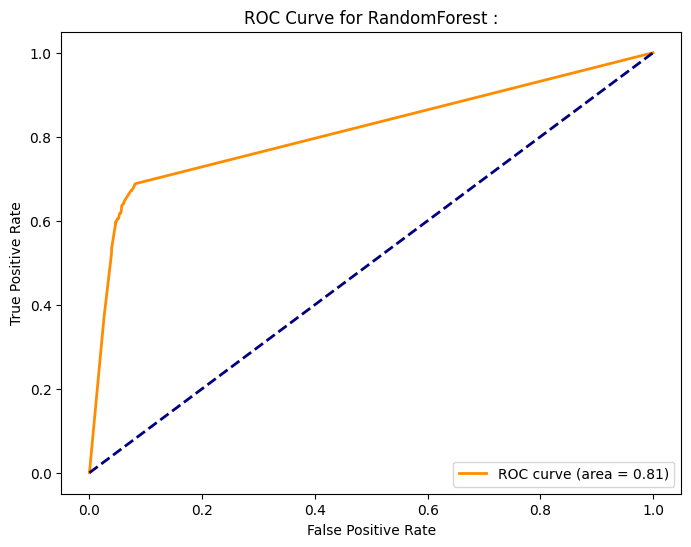


 Naive Bayes : 

Training Score for Naive Bayes :  96.84
Testing Score for Naive Bayes : 96.89
Classification report  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     55899
           1       0.87      0.44      0.59      2936

    accuracy                           0.97     58835
   macro avg       0.92      0.72      0.78     58835
weighted avg       0.97      0.97      0.96     58835

Confusion matrix  
 [[55710   189]
 [ 1643  1293]]
ROC AUC  : 0.7185069986580019
sensitivity is %f 0.44039509536784743
specificity is %f 0.9966189019481565
accuracy is %f 0.9688620718959803
balanced accuracy is % 0.7185069986580019
Type1 Error is %f 189.0
Type2 Error is %f 1643.0


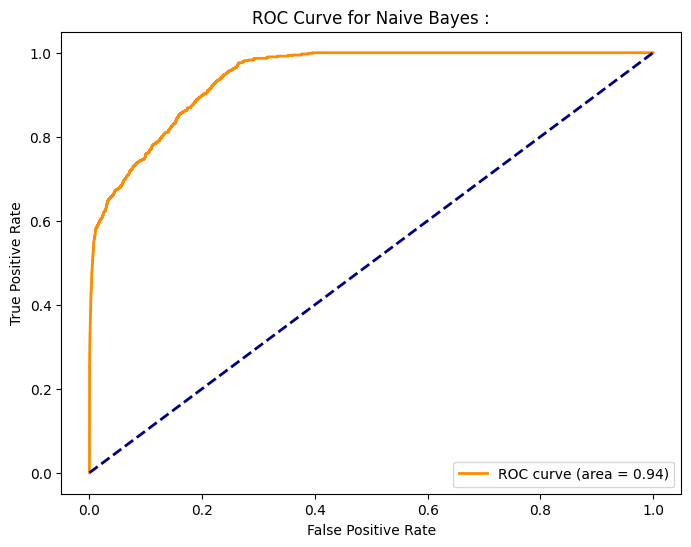


 KNeighbours : 

Training Score for KNeighbours :  97.18
Testing Score for KNeighbours : 96.98
Classification report  
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     55899
           1       0.96      0.41      0.58      2936

    accuracy                           0.97     58835
   macro avg       0.96      0.71      0.78     58835
weighted avg       0.97      0.97      0.96     58835

Confusion matrix  
 [[55843    56]
 [ 1723  1213]]
ROC AUC  : 0.7060726660672009
sensitivity is %f 0.41314713896457766
specificity is %f 0.9989981931698242
accuracy is %f 0.9697628962352342
balanced accuracy is % 0.706072666067201
Type1 Error is %f 56.0
Type2 Error is %f 1723.0


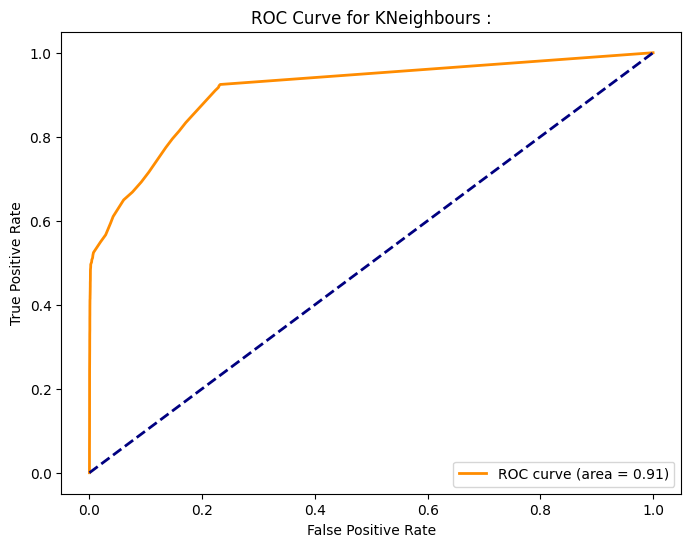


 SVM : 

Training Score for SVM :  99.95
Testing Score for SVM : 95.01
Classification report  
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     55899
           1       0.00      0.00      0.00      2936

    accuracy                           0.95     58835
   macro avg       0.48      0.50      0.49     58835
weighted avg       0.90      0.95      0.93     58835

Confusion matrix  
 [[55899     0]
 [ 2936     0]]
ROC AUC  : 0.5
sensitivity is %f 0.0
specificity is %f 1.0
accuracy is %f 0.9500977309424662
balanced accuracy is % 0.5
Type1 Error is %f 0.0
Type2 Error is %f 2936.0


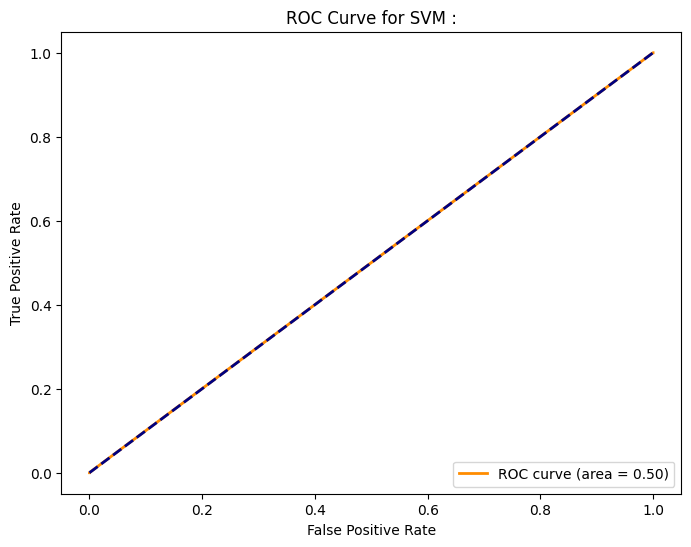

In [ ]:

#classifiers = [['LogisticRegression :', LogisticRegression(C = 0.001,fit_intercept = 'True', penalty= 'l2')],
#               ['DecisionTree :',DecisionTreeClassifier( criterion  = 'entropy', max_depth = 5, max_features='sqrt',
#                                                        min_samples_leaf = '4', min_samples_split= '10', splitter='random')],
#               ['RandomForest :',RandomForestClassifier(max_depth= '1', min_samples_leaf='4', min_samples_split='10', n_estimators='30')],
#              ['Naive Bayes :', GaussianNB(var_smoothing = '0.0001519911082952933')],
#               ['KNeighbours :', KNeighborsClassifier(algorithm ='auto', n_neighbors ='107', weights ='uniform')],
#              ['SVM :', SVC(C = '1',gamma = '1',kernel = 'rbf',probability=True)]]
classifiers = [
    ['LogisticRegression :', LogisticRegression(C=0.001, fit_intercept=True, penalty='l2')],
    ['DecisionTree :', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                                              min_samples_leaf=4, min_samples_split=10, splitter='random')],
    ['RandomForest :', RandomForestClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=10, n_estimators=30)],
    ['Naive Bayes :', GaussianNB(var_smoothing=0.0001519911082952933)],
    ['KNeighbours :', KNeighborsClassifier(algorithm='auto', n_neighbors=107, weights='uniform')],
    ['SVM :', SVC(C=1.0, gamma=1.0, kernel='rbf', probability=True)]
]

for name,classifier in classifiers:
    clf=classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(X_train,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(X_test,y_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(y_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(y_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(y_test,y_pred)}' )
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
    print('Type1 Error is %f',1.*(fp))
    print('Type2 Error is %f',1.*(fn))

    y_pred_prob = clf.predict_proba(X_test)[:,1]  # probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()



 RandomForest : 

Training Score for RandomForest :  97.92
Testing Score for RandomForest : 96.78
Classification report  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     55899
           1       0.74      0.55      0.63      2936

    accuracy                           0.97     58835
   macro avg       0.86      0.77      0.81     58835
weighted avg       0.96      0.97      0.97     58835

Confusion matrix  
 [[55337   562]
 [ 1330  1606]]
ROC AUC  : 0.7684744388392591
sensitivity is %f 0.5470027247956403
specificity is %f 0.989946152882878
accuracy is %f 0.9678422707572023
balanced accuracy is % 0.7684744388392591
Type1 Error is %f 562.0
Type2 Error is %f 1330.0


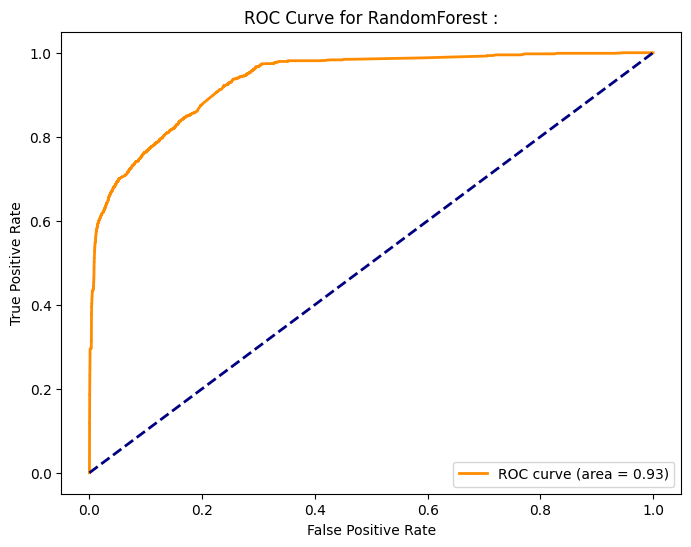

In [ ]:


classifiers = [

    ['RandomForest :', RandomForestClassifier(max_depth=10,min_samples_leaf=4, min_samples_split=10, n_estimators=70)]

]

for name,classifier in classifiers:
    clf=classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(X_train,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(X_test,y_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(y_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(y_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(y_test,y_pred)}' )
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
    print('Type1 Error is %f',1.*(fp))
    print('Type2 Error is %f',1.*(fn))

    y_pred_prob = clf.predict_proba(X_test)[:,1]  # probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()



 LogisticRegression : 

Training Score for LogisticRegression :  97.65
Testing Score for LogisticRegression : 97.11
Classification report  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     55899
           1       0.81      0.55      0.66      2936

    accuracy                           0.97     58835
   macro avg       0.89      0.77      0.82     58835
weighted avg       0.97      0.97      0.97     58835

Confusion matrix  
 [[55519   380]
 [ 1319  1617]]
ROC AUC  : 0.7719756719410197
sensitivity is %f 0.5507493188010899
specificity is %f 0.9932020250809496
accuracy is %f 0.9711226310869381
balanced accuracy is % 0.7719756719410198
Type1 Error is %f 380.0
Type2 Error is %f 1319.0


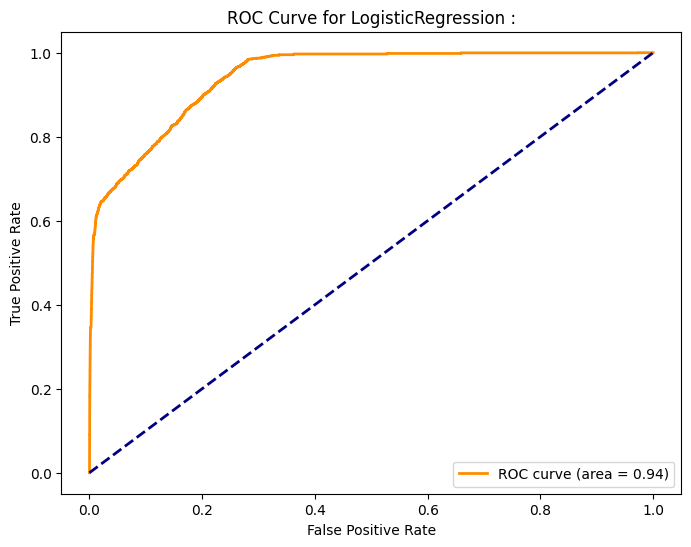


 KNeighbours : 

Training Score for KNeighbours :  96.47
Testing Score for KNeighbours : 96.40
Classification report  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     55899
           1       0.94      0.30      0.45      2936

    accuracy                           0.96     58835
   macro avg       0.95      0.65      0.72     58835
weighted avg       0.96      0.96      0.95     58835

Confusion matrix  
 [[55843    56]
 [ 2065   871]]
ROC AUC  : 0.6478301592552118
sensitivity is %f 0.29666212534059944
specificity is %f 0.9989981931698242
accuracy is %f 0.9639500297441999
balanced accuracy is % 0.6478301592552118
Type1 Error is %f 56.0
Type2 Error is %f 2065.0


In [ ]:


classifiers = [
    ['LogisticRegression :', LogisticRegression(C=1, fit_intercept=True, penalty='l2')],
    ['KNeighbours :', KNeighborsClassifier(algorithm='auto', n_neighbors=60, weights='uniform')],
    ['SVM :', SVC(C=1.0, gamma=1.0, kernel='rbf', probability=True)]
]


for name,classifier in classifiers:
    clf=classifier.fit(X_train_minmax,y_train)
    y_pred=classifier.predict(X_test_minmax)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(X_train_minmax,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(X_test_minmax,y_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(y_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(y_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(y_test,y_pred)}' )
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
    print('Type1 Error is %f',1.*(fp))
    print('Type2 Error is %f',1.*(fn))

    y_pred_prob = clf.predict_proba(X_test_minmax)[:,1]  # probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


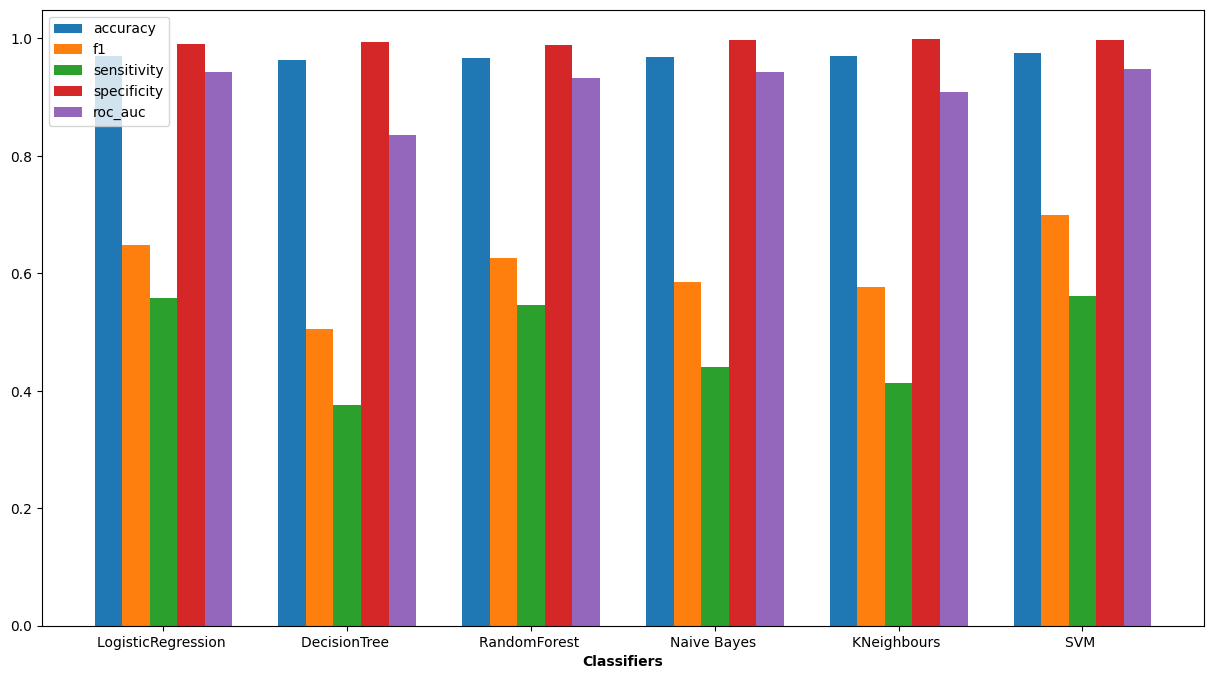

In [ ]:





classifiers = [['LogisticRegression :', LogisticRegression(C=1, fit_intercept=True, penalty='l2')],
               ['DecisionTree :',DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                                              min_samples_leaf=4, min_samples_split=10, splitter='random')],
               ['RandomForest :',RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70)],
               ['Naive Bayes :', GaussianNB(var_smoothing=0.0001519911082952933)],
               ['KNeighbours :', KNeighborsClassifier(algorithm='auto', n_neighbors=107, weights='uniform')],
               ['SVM :', SVC(C=10, gamma='scale', kernel='rbf', probability=True)]]

# Store metrics for each classifier in a dictionary
metrics_data = {
    'accuracy': [],
    'f1': [],
    'sensitivity': [],
    'specificity': [],
    'roc_auc': []
}

classifiers_names = []

for name, classifier in classifiers:
    # Fit the model
    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:,1]  # probabilities for the positive class

    # Compute metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1 = f1_score(y_test, y_pred,average='weighted')
    sensitivity = 1.*tp/(tp+fn)
    specificity = 1.*tn/(tn+fp)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Append metrics to the dictionary
    metrics_data['accuracy'].append(accuracy)
    metrics_data['f1'].append(f1)
    metrics_data['sensitivity'].append(sensitivity)
    metrics_data['specificity'].append(specificity)
    metrics_data['roc_auc'].append(roc_auc)

    classifiers_names.append(name.split(":")[0])  # extract the name of the classifier

# Plotting bar chart
barWidth = 0.15
r = np.arange(len(classifiers_names))
plt.figure(figsize=(15,8))

for i, metric in enumerate(metrics_data.keys()):
    plt.bar([x + i*barWidth for x in r], metrics_data[metric], width=barWidth, label=metric)

plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(classifiers_names))], classifiers_names)
plt.legend()
plt.show()


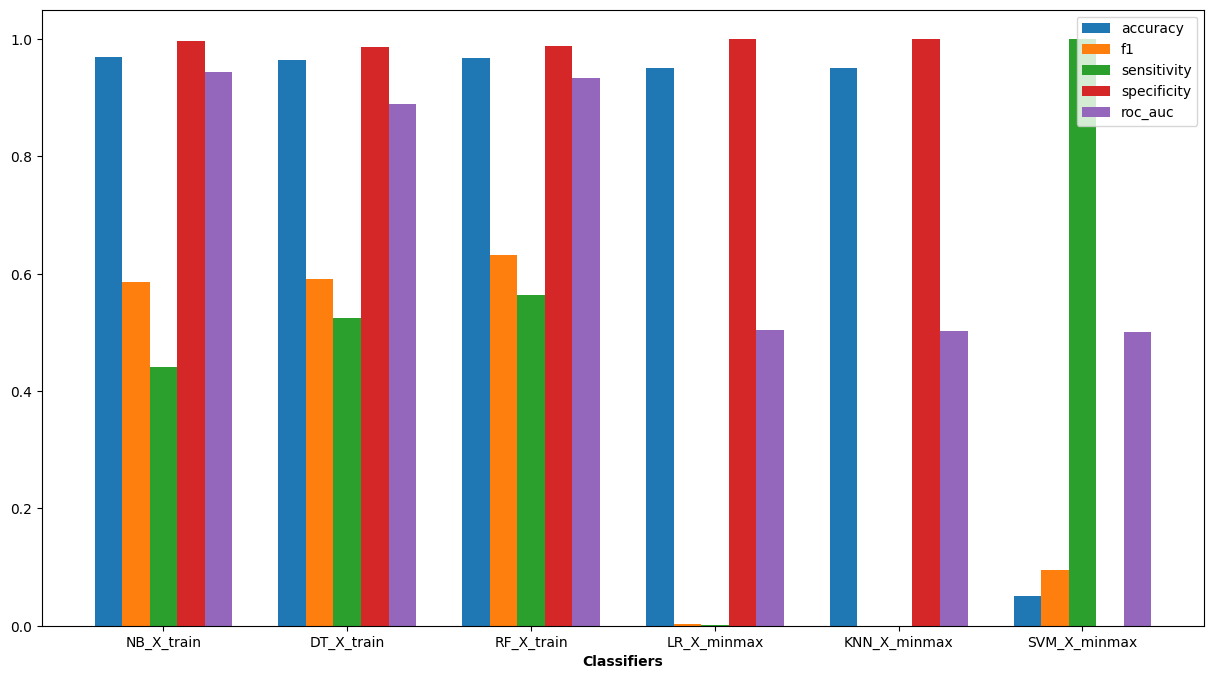

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define the classifiers
classifiers = [
    # The first three classifiers for X_train

    ['NB_X_train:', GaussianNB(var_smoothing=0.0001519911082952933)],
    ['DT_X_train:', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                                              min_samples_leaf=4, min_samples_split=10, splitter='random')],
    ['RF_X_train:', RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70)],
    # The next three classifiers for X_minmax
    ['LR_X_minmax:', LogisticRegression(C=1, fit_intercept=True, penalty='l2')],
    ['KNN_X_minmax:', KNeighborsClassifier(algorithm='auto', n_neighbors=50, weights='uniform')],
    ['SVM_X_minmax:', SVC(C=1.0, gamma=1.0, kernel='rbf', probability=True)]
]

metrics_data = {
    'accuracy': [],
    'f1': [],
    'sensitivity': [],
    'specificity': [],
    'roc_auc': []
}

classifiers_names = []

for name, classifier in classifiers:
    if "X_train" in name:
        clf = classifier.fit(X_train, y_train)
    else:
        clf = classifier.fit(X_train_minmax, y_train)

    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:,1]  # probabilities for the positive class

    # Compute metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1 = f1_score(y_test, y_pred)
    sensitivity = 1.*tp/(tp+fn)
    specificity = 1.*tn/(tn+fp)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Append metrics to the dictionary
    metrics_data['accuracy'].append(accuracy)
    metrics_data['f1'].append(f1)
    metrics_data['sensitivity'].append(sensitivity)
    metrics_data['specificity'].append(specificity)
    metrics_data['roc_auc'].append(roc_auc)

    classifiers_names.append(name.split(":")[0])  # extract the name of the classifier

# Plotting bar chart
barWidth = 0.15
r = np.arange(len(classifiers_names))
plt.figure(figsize=(15,8))

for i, metric in enumerate(metrics_data.keys()):
    plt.bar([x + i*barWidth for x in r], metrics_data[metric], width=barWidth, label=metric)

plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(classifiers_names))], classifiers_names)
plt.legend()
plt.show()


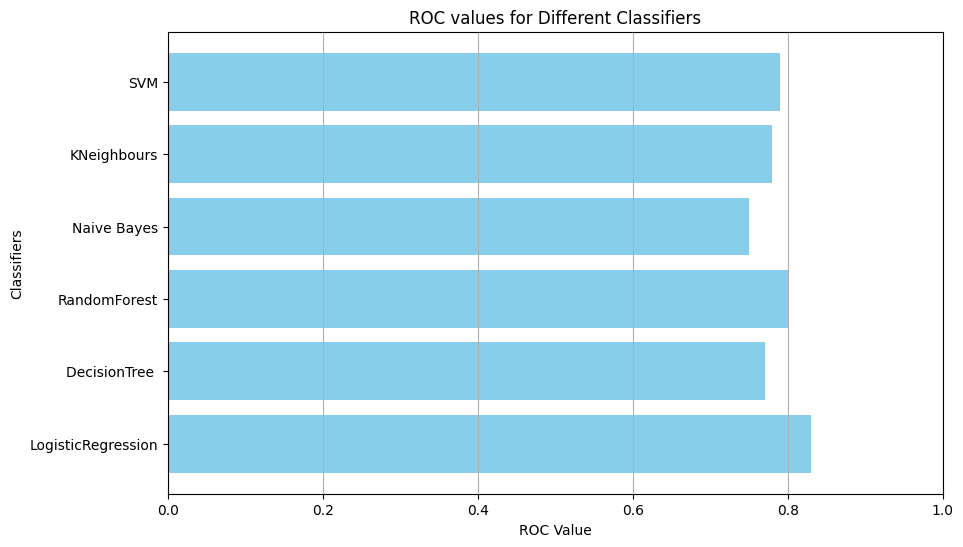

In [ ]:
import matplotlib.pyplot as plt

# Your ROC values for different classifiers
roc_values = {
    'LogisticRegression': 0.83,
    'DecisionTree ': 0.77,
    'RandomForest': 0.80,
    'Naive Bayes': 0.75,
    'KNeighbours': 0.78,
    'SVM': 0.79,

}

# Extract names and values
names = list(roc_values.keys())
values = list(roc_values.values())

# Plotting
plt.figure(figsize=(10,6))
plt.barh(names, values, color='skyblue')
plt.xlabel('ROC Value')
plt.ylabel('Classifiers')
plt.title('ROC values for Different Classifiers')
plt.xlim(0, 1)  # Assuming ROC values are between 0 and 1
plt.grid(axis='x')
plt.show()


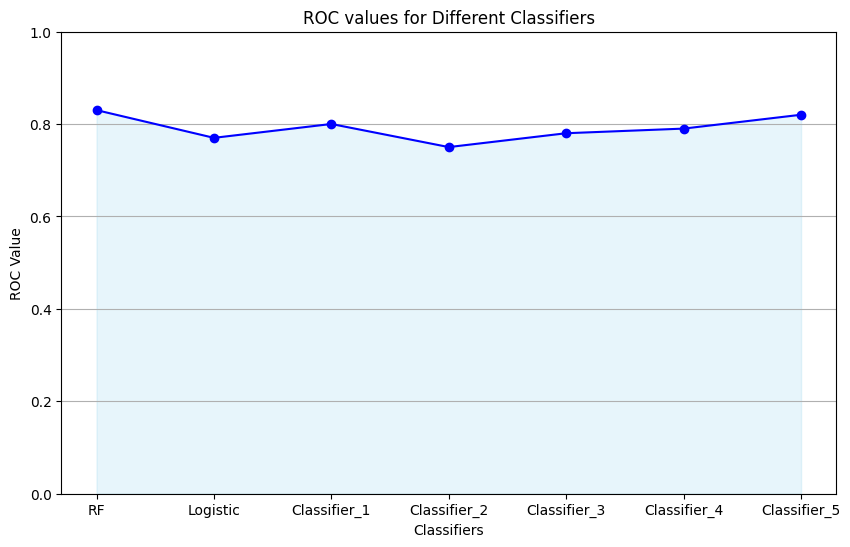

In [ ]:
import matplotlib.pyplot as plt

# Your ROC values for different classifiers
roc_values = {
    'RF': 0.83,
    'Logistic': 0.77,
    # Add your other classifiers and their ROC values here
    'Classifier_1': 0.80,
    'Classifier_2': 0.75,
    'Classifier_3': 0.78,
    'Classifier_4': 0.79,
    'Classifier_5': 0.82
}

# Extract names and values
names = list(roc_values.keys())
values = list(roc_values.values())

# Plotting
plt.figure(figsize=(10,6))
plt.plot(names, values, marker='o', linestyle='-', color='blue')
plt.fill_between(names, values, color='skyblue', alpha=0.2)
plt.xlabel('Classifiers')
plt.ylabel('ROC Value')
plt.title('ROC values for Different Classifiers')
plt.ylim(0, 1)  # Assuming ROC values are between 0 and 1
plt.grid(axis='y')
plt.show()


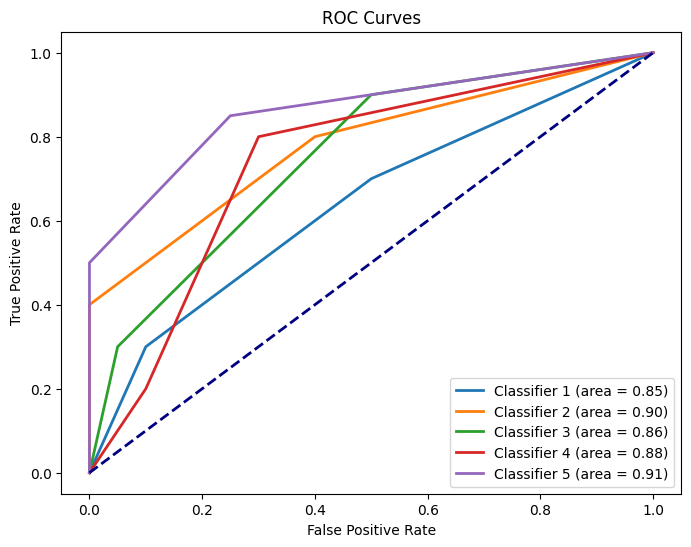

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curves(fpr_list, tpr_list, auc_list, names):
    plt.figure(figsize=(8,6))

    for fpr, tpr, auc_val, name in zip(fpr_list, tpr_list, auc_list, names):
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {auc_val:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Example Data:
# Replace these with your actual data
fpr1, tpr1 = [0.0, 0.1, 0.5, 1.0], [0.0, 0.3, 0.7, 1.0]
fpr2, tpr2 = [0.0, 0.0, 0.4, 1.0], [0.0, 0.4, 0.8, 1.0]
fpr3, tpr3 = [0.0, 0.05, 0.5, 1.0], [0.0, 0.3, 0.9, 1.0]
fpr4, tpr4 = [0.0, 0.1, 0.3, 1.0], [0.0, 0.2, 0.8, 1.0]
fpr5, tpr5 = [0.0, 0.0, 0.25, 1.0], [0.0, 0.5, 0.85, 1.0]

# ROC data for 5 classifiers
fpr_list = [fpr1, fpr2, fpr3, fpr4, fpr5]
tpr_list = [tpr1, tpr2, tpr3, tpr4, tpr5]
auc_list = [0.85, 0.90, 0.86, 0.88, 0.91]  # AUC values for the 5 classifiers
names = ["Classifier 1", "Classifier 2", "Classifier 3", "Classifier 4", "Classifier 5"]

plot_roc_curves(fpr_list, tpr_list, auc_list, names)
